<a href="https://colab.research.google.com/github/mosmtilk222/Data-Analysis-Projects/blob/main/Houses_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Houses Analysis**

This data analysis freelance project is about analyzing the data obtained through a previous web scraping project about scraping all the houses in a house sales site and uploading them to a database. There are **11,000 +** rows in the database and 7 colums. **A lot of data meaning a lots of fun!**

In [88]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt

Declaring all the functions we will need

In [89]:
#All the states possible in the US

STATES = ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA', 'HI', 'ID',
          'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MS', 'MO', 'MT',
          'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'PR',
          'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'VI', 'WA', 'WV', 'WI', 'WY']

def to_int(x):
  if x == '':
    return np.NaN
  else:
    return int(x)

def price(x):
  try:
    x = x.replace('$', '')
    x = x.replace(' ', '')
    return int(x)
  except ValueError:
    return np.NaN

def whatever_to_sqft(x):
  try:
    if 'acres' in x:
      x = x.casefold()
      x = x.replace('acres', '')
      x = x.replace(' ', '')
      x = float(x)
      x = x * 43560
      return x

    elif 'sqft' in x:
      x = x.casefold()
      x = x.replace('sqft', '')
      x = x.replace(' ', '')
      return float(x)

    elif 'sqm' in x:
      x = x.casefold()
      x = x.replace('sqm', '')
      x = x.replace(' ', '')
      x = float(x)
      x = x * 10.764
      return x
  except ValueError:
    return np.NaN

def format_str(x):
  x = x.lower()
  x = x.replace('county', '')
  return x

def city(x):
  try:
    x = re.split(',', x)
    return x[0].lower()
  except IndexError:
    return pd.NA

def state(x):
  try:
    x = re.split(',', x)
    return x[1].upper()
  except IndexError:
    return pd.NA

Setting up all we need, bringing the data and formatting a little

In [90]:
from sqlite3 import connect

conn = connect('database.db')

# A decimal after the point and a comma every tree numbers
pd.options.display.float_format = '{:,.1f}'.format

df = pd.read_sql('SELECT * FROM \'Houses for sale\'', conn)
df.rename(columns= {'Price': 'Price (US Dollars)',
                     'Lot size': 'Lot size (sqft)',
                     'Living area': 'Living area (sqft)'
                     },
          inplace = True
          )

df

,Address,Price (US Dollars),County,Lot size (sqft),Bedrooms,Total bathrooms,Living area (sqft)
0,"Kirkland,AZ,United States",$4600000,Yavapai County,,3,3,4374sqft
1,"Paradise Valley,AZ,United States",$3100000,Maricopa County,1.38acres,2,3,2810sqft
2,"Austin,TX,United States",$1025000,Travis,,4,4,3592sqft
3,"Chandler,AZ,United States",$949999,Maricopa,,4,4,3235sqft
4,"Orlando,FL,United States",$535000,Orange,,3,4,1893sqft
...,...,...,...,...,...,...,...
11968,"Melbourne,FL,United States",$574900,,131551.0sqft,3,3,2082sqft
11969,"Melbourne,FL,United States",$709900,,131551.0sqft,3,3,2345sqft
11970,"Edmonds,WA,United States",$770000,Snohomish,604753.0sqft,2,,
11971,"Seattle,WA,United States",$889000,King,1677.0sqft,3,,1320sqft


This is the key part of the project.

This data was a mess, all the rows had something wrong or weird formatted or whatever.

In order what I did here:


*   **Replacing** non sense entrys  with NaN or NA
*   **Converting** all the measures we had in lot size and living area to a more standard measure in the US like sqft is
*   **Creating** the city and state columns from the previous columns address achieving a more structured data
*   **Deleting** extra words like "county" in the County column because it caused misnuderstanding and also deleting the Address column 



In [91]:
df['Price (US Dollars)'] = df['Price (US Dollars)'].apply(lambda x: price(x))
df['County'] = df['County'].apply(lambda x: format_str(x))
df['Bedrooms'] = df['Bedrooms'].apply(lambda x: to_int(x))
df['Lot size (sqft)'] = df['Lot size (sqft)'].apply(lambda x: whatever_to_sqft(x))
df['Total bathrooms'] = df['Total bathrooms'].apply(lambda x: to_int(x))
df['Living area (sqft)'] = df['Living area (sqft)'].apply(lambda x: whatever_to_sqft(x))
df['City'] = df['Address'].apply(lambda x: city(x))
df['State'] = df['Address'].apply(lambda x: state(x))
df.drop(['Address'], axis=1, inplace=True)
df

,Price (US Dollars),County,Lot size (sqft),Bedrooms,Total bathrooms,Living area (sqft),City,State
0,"4,600,000.0",yavapai,NaN,3.0,3.0,"4,374.0",kirkland,AZ
1,"3,100,000.0",maricopa,"60,112.8",2.0,3.0,"2,810.0",paradise valley,AZ
2,"1,025,000.0",travis,NaN,4.0,4.0,"3,592.0",austin,TX
3,"949,999.0",maricopa,NaN,4.0,4.0,"3,235.0",chandler,AZ
4,"535,000.0",orange,NaN,3.0,4.0,"1,893.0",orlando,FL
...,...,...,...,...,...,...,...,...
11968,"574,900.0",,"131,551.0",3.0,3.0,"2,082.0",melbourne,FL
11969,"709,900.0",,"131,551.0",3.0,3.0,"2,345.0",melbourne,FL
11970,"770,000.0",snohomish,"604,753.0",2.0,NaN,NaN,edmonds,WA
11971,"889,000.0",king,"1,677.0",3.0,NaN,"1,320.0",seattle,WA


Checking data types are correct

In [93]:
df.dtypes

Price (US Dollars)      Int64
County                 string
Lot size (sqft)       Float64
Bedrooms                Int64
Total bathrooms         Int64
Living area (sqft)    Float64
City                   string
State                  string
dtype: object

Quick investigation in our entire dataset

In [95]:
df.describe(include='all')

,Price (US Dollars),County,Lot size (sqft),Bedrooms,Total bathrooms,Living area (sqft),City,State
count,"11,956.0",11973,"3,886.0","11,435.0","10,652.0","8,960.0",11973,11874
unique,NaN,661,NaN,NaN,NaN,NaN,1978,47
top,NaN,,NaN,NaN,NaN,NaN,naples,CA
freq,NaN,1878,NaN,NaN,NaN,NaN,325,1740
mean,"2,185,867.6",NaN,"19,251,466.8",4.0,3.9,"11,615.2",NaN,NaN
std,"3,588,716.7",NaN,"388,038,958.2",1.6,2.2,"642,807.4",NaN,NaN
min,"469,000.0",NaN,1.0,1.0,1.0,1.0,NaN,NaN
25%,"765,000.0",NaN,"9,247.5",3.0,3.0,"2,082.0",NaN,NaN
50%,"1,180,000.0",NaN,"55,103.3",4.0,3.0,"2,959.0",NaN,NaN
75%,"2,199,000.0",NaN,"217,800.0",5.0,5.0,"4,336.2",NaN,NaN


A more detailed investigation in a state of our choosing just by putting the state abreviation in **CAPITALS**

In [96]:
state = str(input('State: '))
df_state = df[(df['Price (US Dollars)'] > 490000) & (df['State'] == f'{state}') & (df['Bedrooms'] > 1)]
df_state.describe(include='all')

State: CA


,Price (US Dollars),County,Lot size (sqft),Bedrooms,Total bathrooms,Living area (sqft),City,State
count,"1,584.0",1584,654.0,"1,584.0","1,121.0","1,534.0",1584,1584
unique,NaN,171,NaN,NaN,NaN,NaN,329,1
top,NaN,,NaN,NaN,NaN,NaN,los angeles,CA
freq,NaN,432,NaN,NaN,NaN,NaN,106,1584
mean,"3,158,838.9",NaN,"1,759,985.7",3.9,3.5,"10,087.7",NaN,NaN
std,"5,099,753.5",NaN,"14,161,884.0",1.4,2.1,"234,148.4",NaN,NaN
min,"500,000.0",NaN,1.0,2.0,1.0,2.0,NaN,NaN
25%,"1,057,500.0",NaN,"6,037.2",3.0,2.0,"1,732.0",NaN,NaN
50%,"1,650,000.0",NaN,"10,903.5",4.0,3.0,"2,482.0",NaN,NaN
75%,"3,195,000.0",NaN,"53,687.7",5.0,4.0,"3,675.8",NaN,NaN


Couple of plots showing the median and mean of every state in the dataset (don't have few states), see that the plots vary a bit because the presence of outliers

Note: 1e6 means 1,000,000

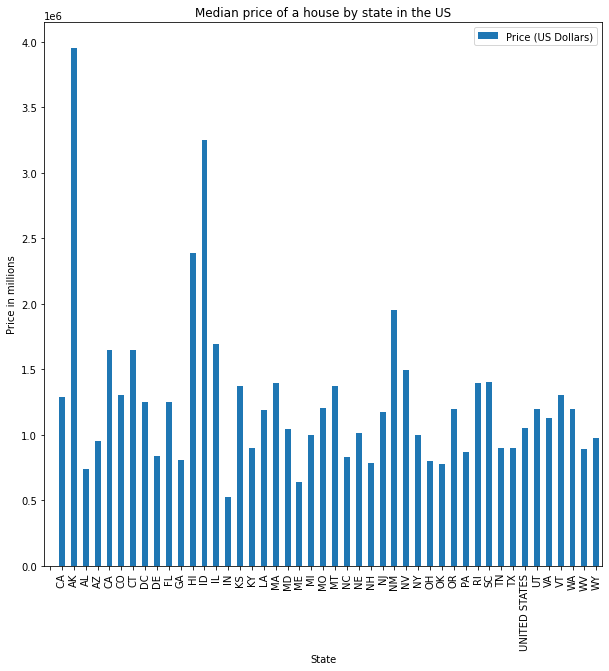

In [97]:
df_mean_c = df.groupby(['State'])[['Price (US Dollars)']].median()
df_mean_c.plot(figsize = (10,10), kind='bar', xlabel= 'State', ylabel= 'Price in millions', title= 'Median price of a house by state in the US')

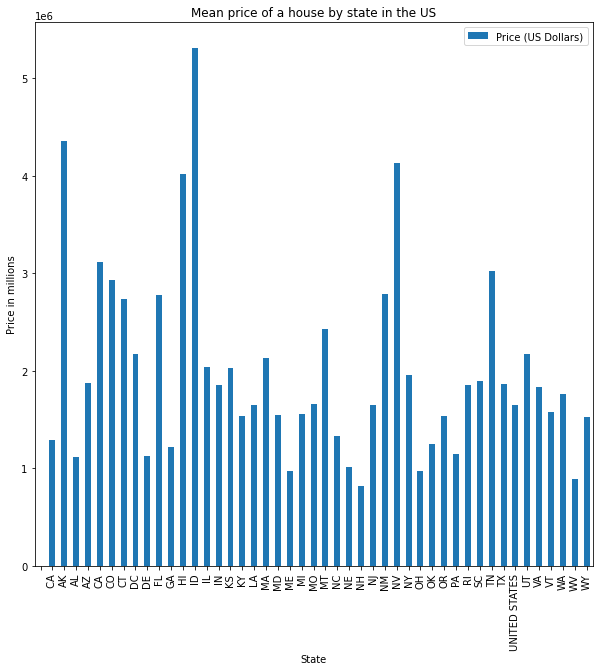

In [98]:
df_mean_c = df.groupby(['State'])[['Price (US Dollars)']].mean()
df_mean_c.plot(figsize = (10,10), kind='bar', xlabel= 'State', ylabel= 'Price in millions', title= 'Mean price of a house by state in the US')

Also the client for a little ML algorithm to predict how many a house will cost based on the rooms it has.
 
Here just a simply linear regression with a sample of valid data to predict how many will it cost. Obviously this is in the whole US and varies in every State or even cities 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  import sys


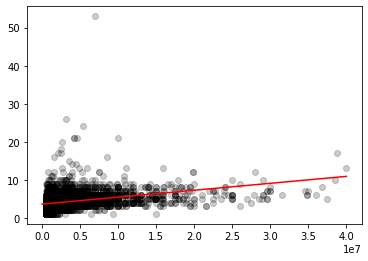

In [99]:
valid_df = df[(df['Bedrooms'] >= 1) & (df['Price (US Dollars)'] <= 40000000)]
X = np.array(valid_df.iloc[:, 0].values)
Y = np.array(valid_df.iloc[:, 3].values)

plt.scatter(X, Y, alpha=0.2, c="black")

X = np.array([np.ones(11407), X], dtype = np.float).T

B = np.linalg.inv(X.T @ X) @ X.T @ Y

plt.plot([1, 40000000], [B[0] + B[1] * 1, B[0] + B[1] * 40000000], c="red")
plt.show()